## 1. Load data

In [1]:
from process import *

data = load_data(DatasetDirectory.HEART_DISEASE)

## 2. Prepare datasets

### 2.1. shuffle and split dataset

In [2]:
data_preprocessing(data, DatasetDirectory.HEART_DISEASE)

ratios = ["40_60", "60_40", "80_20", "90_10"]

datasets = {
    "40_60": (prepare_dataset_v2(data, train_ratio=0.4, test_ratio=0.6,
                dataset_directory=DatasetDirectory.HEART_DISEASE)),
    "60_40": (prepare_dataset_v2(data, train_ratio=0.6, test_ratio=0.4,
                dataset_directory=DatasetDirectory.HEART_DISEASE)),
    "80_20": (prepare_dataset_v2(data, train_ratio=0.8, test_ratio=0.2,
                dataset_directory=DatasetDirectory.HEART_DISEASE)),
    "90_10": (prepare_dataset_v2(data, train_ratio=0.9, test_ratio=0.1,
                dataset_directory=DatasetDirectory.HEART_DISEASE)),
    }


### 2.2. Visualize the class distributions

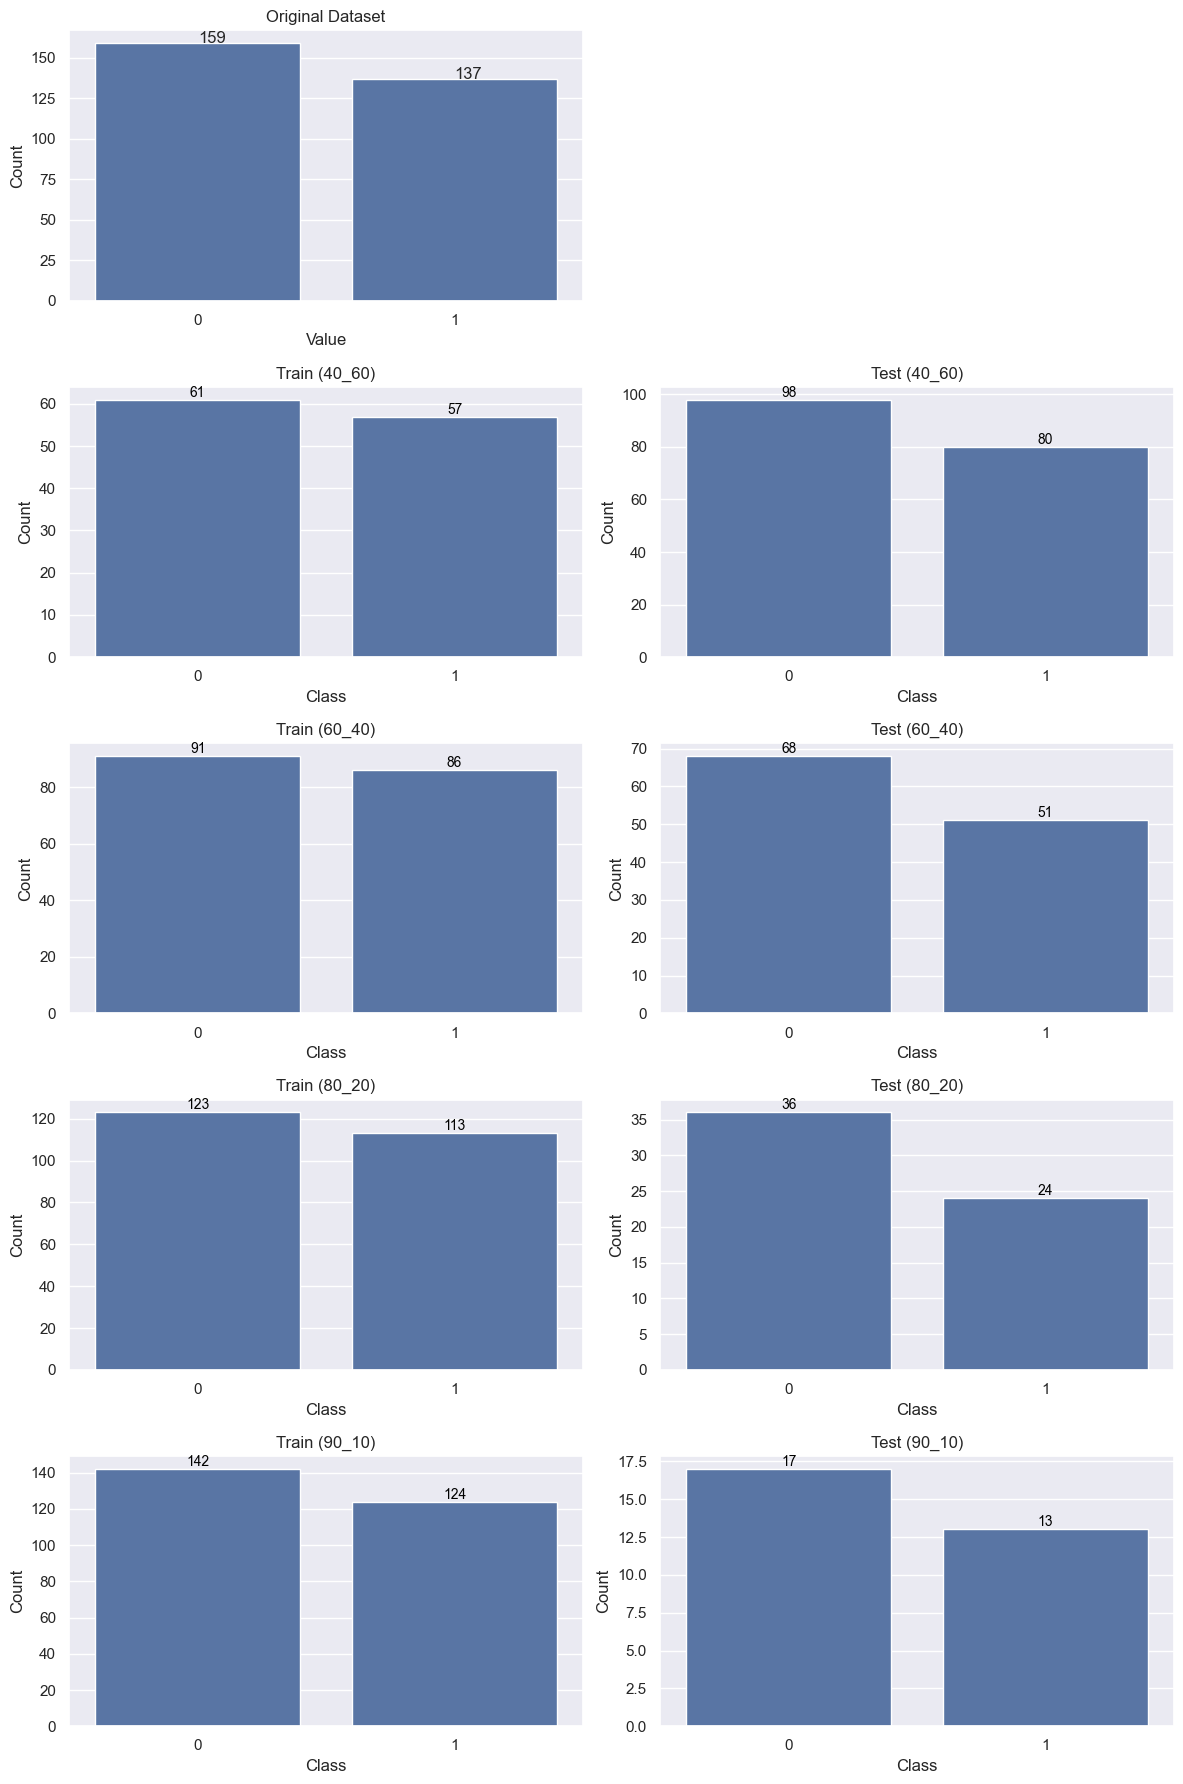

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 18))
sns.set(style="darkgrid")

plt.subplot(5, 2, 1)
ax = sns.countplot(x=data['target'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()))
plt.title('Original Dataset')
plt.ylabel('Count')
plt.xlabel('Value')
plt.subplot(5, 2, 2)
plt.axis('off')

for i, ratio in enumerate(ratios): 
    label_train = datasets[ratio][1]
    label_test = datasets[ratio][3]
    
    # Train
    plt.subplot(5, 2, 2*(i+1) + 1)
    ax1 = sns.countplot(x=label_train)
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    plt.title(f'Train ({ratio})')
    plt.ylabel('Count')
    plt.xlabel('Class')

    # Test
    plt.subplot(5, 2, 2*(i+1) + 2)
    ax2 = sns.countplot(x=label_test)
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    plt.title(f'Test ({ratio})')
    plt.ylabel('Count')
    plt.xlabel('Class')

plt.tight_layout()
plt.show()

## 3. Build the decision tree classifier

### 3.1 Build model

In [4]:
from sklearn.tree import DecisionTreeClassifier

clfs = {}
label_preds = {}
for ratio in ratios:
    feature_train, label_train, feature_test, label_test = datasets[ratio]
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=None)
    clf.fit(feature_train, label_train)
    clfs[ratio] = clf
    label_preds[ratio] = clf.predict(feature_test)

### 3.2 Visualize the decision tree

Decision tree visualization for ratio = 40_60 was saved
d:\CSTTNT\Project\Project 2\src\png\heart_disease\ratio/heart_disease_tree_40_60.png
Decision tree visualization for ratio = 60_40 was saved
d:\CSTTNT\Project\Project 2\src\png\heart_disease\ratio/heart_disease_tree_60_40.png
Decision tree visualization for ratio = 80_20 was saved
d:\CSTTNT\Project\Project 2\src\png\heart_disease\ratio/heart_disease_tree_80_20.png
Decision tree visualization for ratio = 90_10 was saved
d:\CSTTNT\Project\Project 2\src\png\heart_disease\ratio/heart_disease_tree_90_10.png


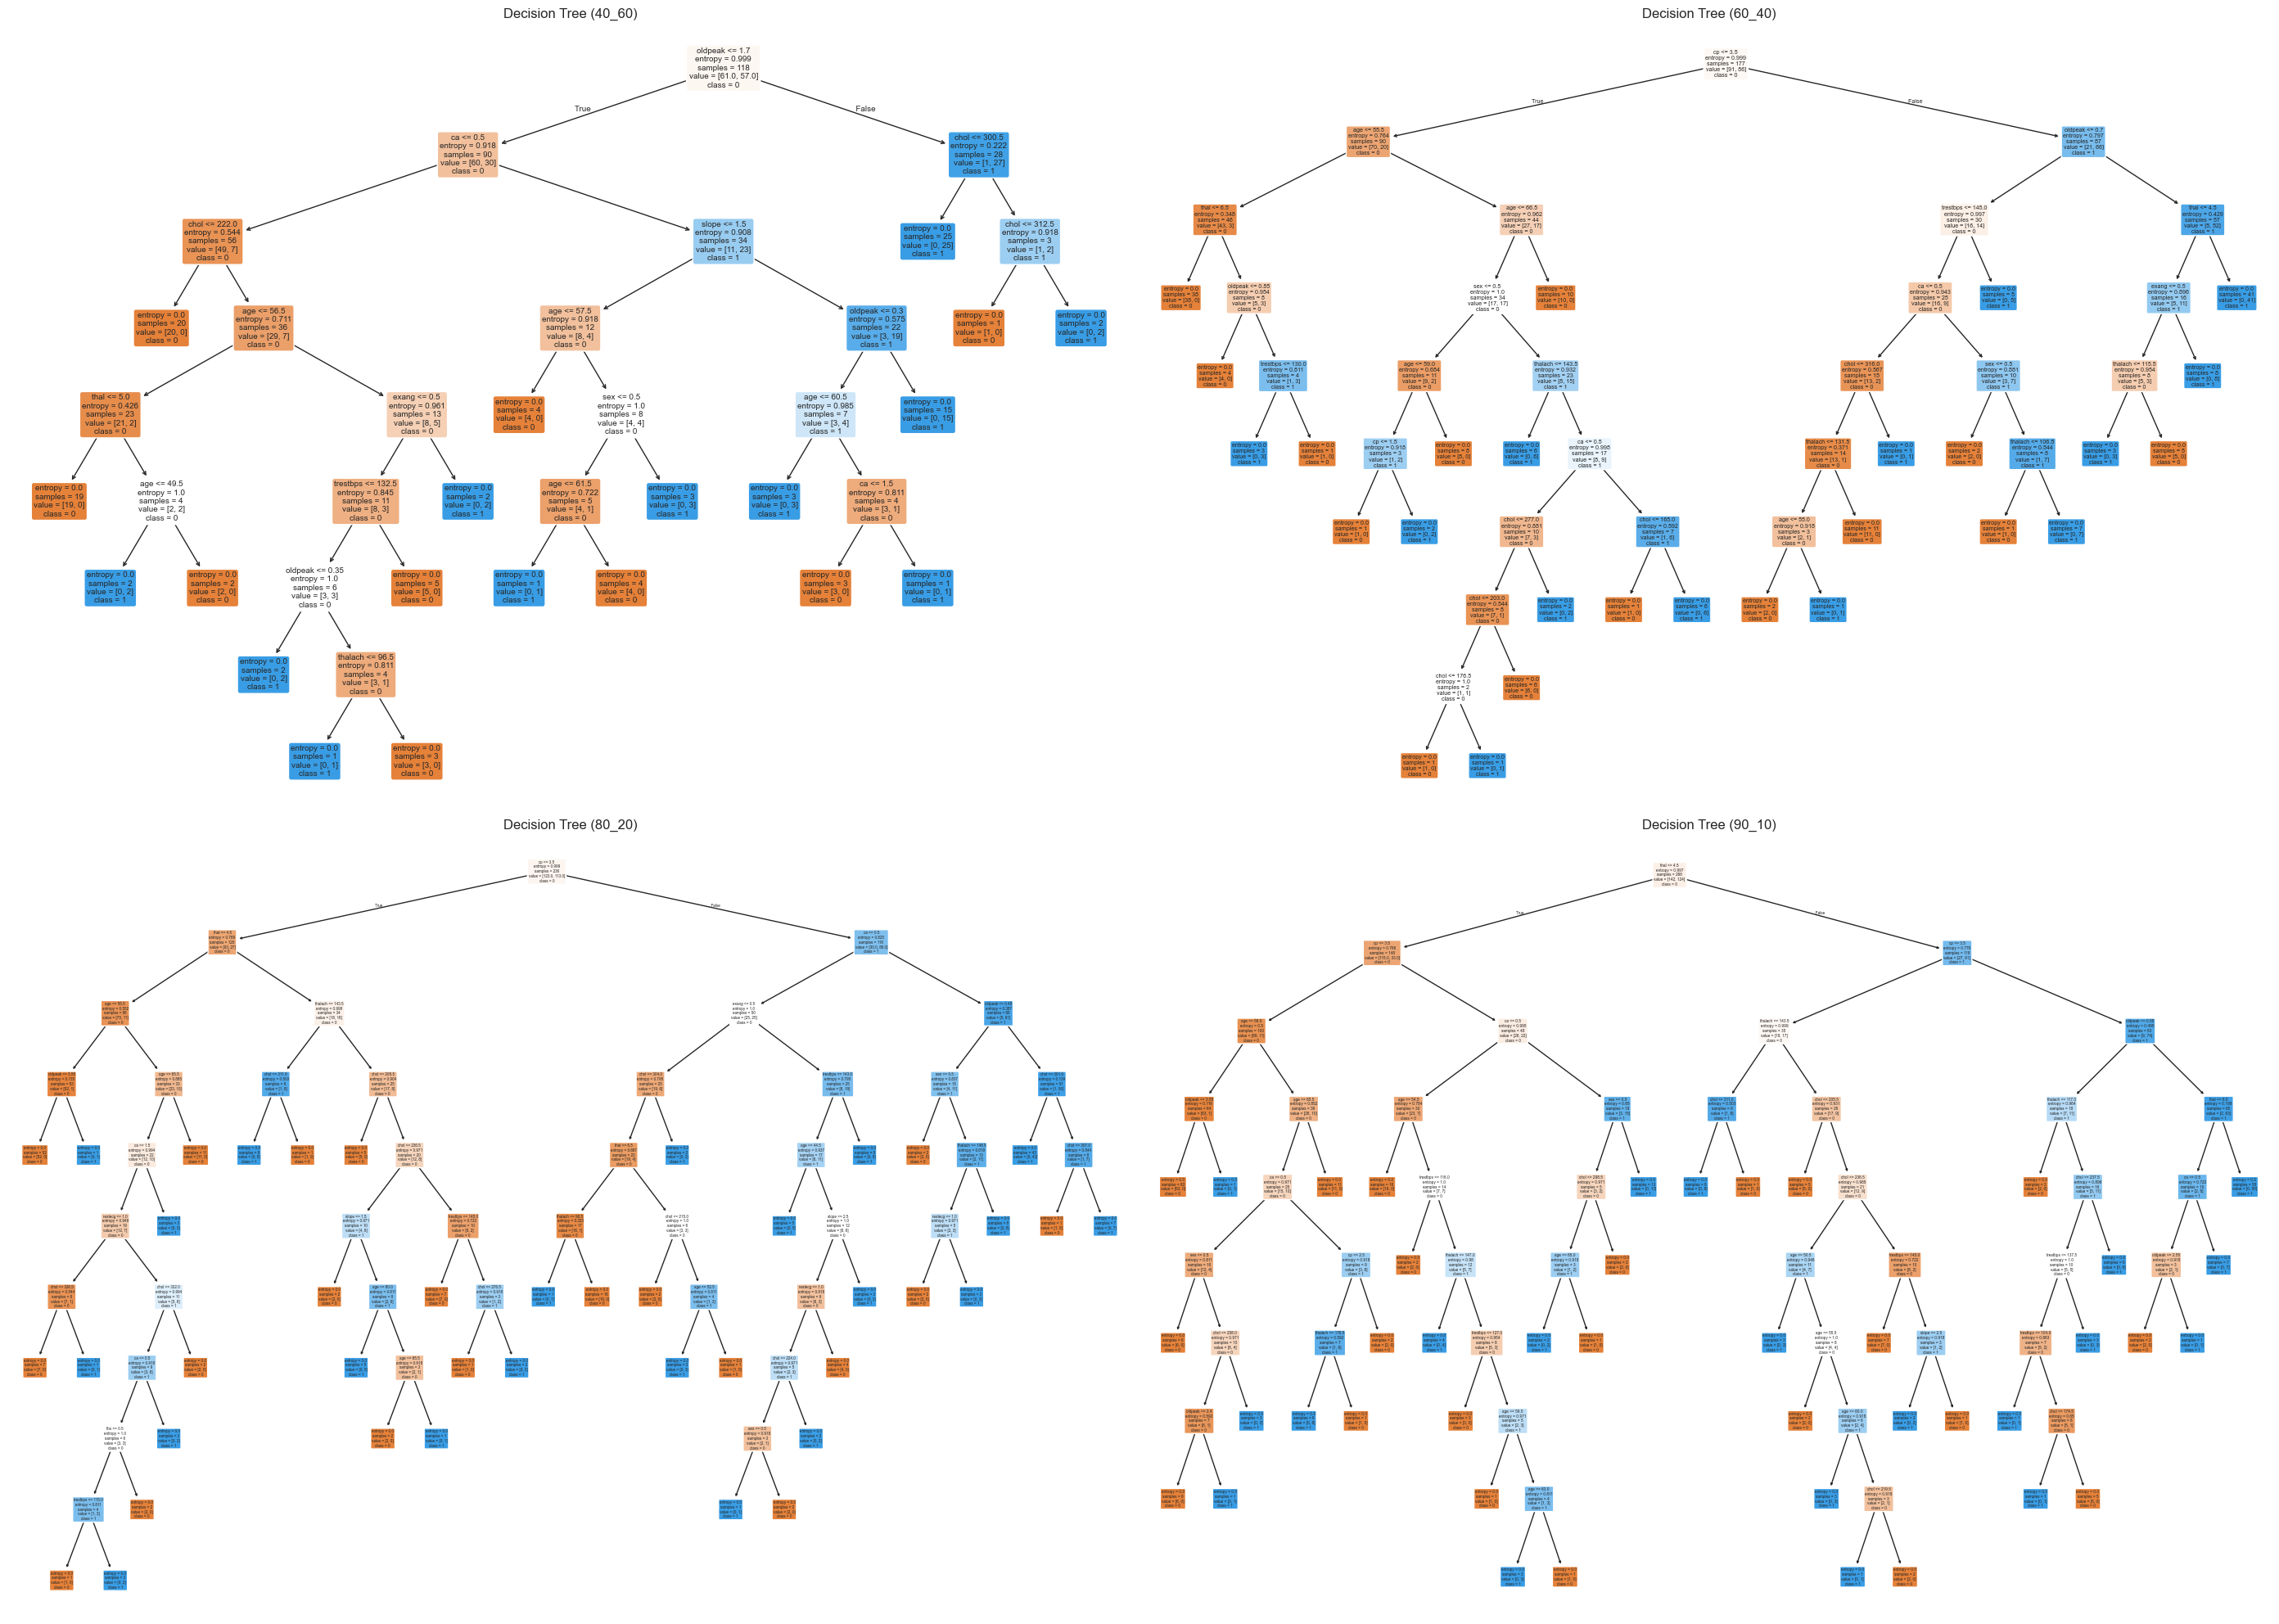

In [5]:
import graphviz
from sklearn import tree
import os
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

outputRatio_dir = os.path.join(os.getcwd(), "png", "heart_disease", "ratio")
os.makedirs(outputRatio_dir, exist_ok=True)

plt.figure(figsize=(28,20))
for i, ratio in enumerate(clfs.keys()):
    plt.subplot(2, 2, i+1)
    clf = clfs[ratio]
    plot_tree(clf, 
            feature_names=[col for col in data.columns if col != "target"],
            class_names=[str(i) for i in sorted(set(datasets[ratio][1]))],
            filled=True, rounded=True)
    plt.title(f"Decision Tree ({ratio})")
    
    dot_data = tree.export_graphviz(clf, out_file=None,
            feature_names=[col for col in data.columns if col != "target"],
            class_names=[str(i) for i in sorted(set(datasets[ratio][1]))],
            filled=True, rounded=True,
            special_characters=True)

    graph = graphviz.Source(dot_data)
    name_ratio = f'heart_disease_tree_{ratio}'
    graph.render(filename=os.path.join(outputRatio_dir, name_ratio), format='png', cleanup=True)
    print(f"Decision tree visualization for ratio = {ratio} was saved")
    print(f"{outputRatio_dir}/{name_ratio}.png")

plt.tight_layout()
plt.show()


## 4. Evaluating the decision tree classifiers

---------------- 40_60 --------------------
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        98
           1       0.71      0.69      0.70        80

    accuracy                           0.73       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.73      0.73      0.73       178

Confusion Matrix:
[[75 23]
 [25 55]]
---------------- 60_40 --------------------
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        68
           1       0.73      0.71      0.72        51

    accuracy                           0.76       119
   macro avg       0.76      0.76      0.76       119
weighted avg       0.76      0.76      0.76       119

Confusion Matrix:
[[55 13]
 [15 36]]
---------------- 80_20 --------------------
Accuracy: 0.77
Classification Report:
              precision   

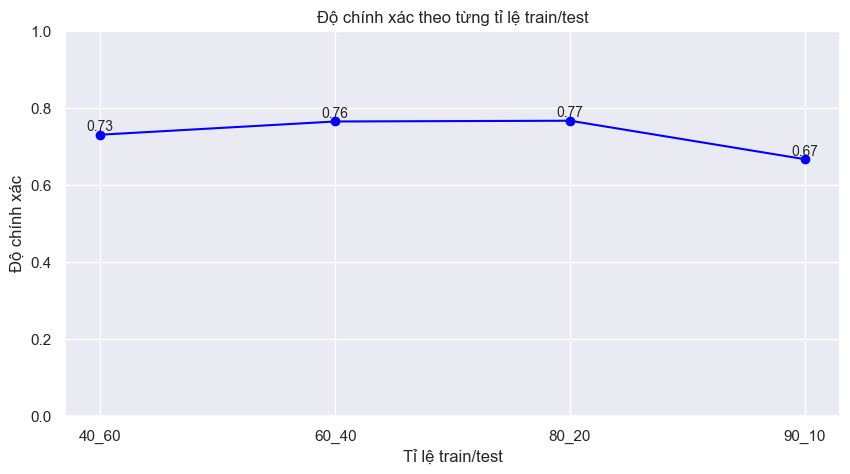

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

accuracies = {}

for ratio in ratios:
    print(f'---------------- {ratio} --------------------')
    feature_train, label_train, feature_test, label_test = datasets[ratio]
    accuracy = accuracy_score(label_test, label_preds[ratio])
    accuracies[ratio] = accuracy
    print(f"Accuracy: {accuracy:.2f}")

    print("Classification Report:")
    print(classification_report(label_test, label_preds[ratio]))

    print("Confusion Matrix:")
    print(confusion_matrix(label_test, label_preds[ratio]))
    

accuracy_values = [accuracies[ratio] for ratio in ratios]

plt.figure(figsize=(10, 5))
plt.plot(ratios, accuracy_values, marker='o', linestyle='-', color='blue')
plt.title('Độ chính xác theo từng tỉ lệ train/test')
plt.xlabel('Tỉ lệ train/test')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1)
for i, acc in enumerate(accuracy_values):
    plt.text(ratios[i], acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.grid(True)
plt.show()
    

## 5. The depth and accuracy of a decision tree

Depth: None
Accuracy: 0.77
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_None.png
Depth: 2
Accuracy: 0.78
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_2.png
Depth: 3
Accuracy: 0.80
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_3.png
Depth: 4
Accuracy: 0.78
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_4.png
Depth: 5
Accuracy: 0.77
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_5.png
Depth: 6
Accuracy: 0.77
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_6.png
Depth: 7
Accuracy: 0.75
Saved to d:\CSTTNT\Project\Project 2\src\png\heart_disease\depth/heart_disease_tree_7.png


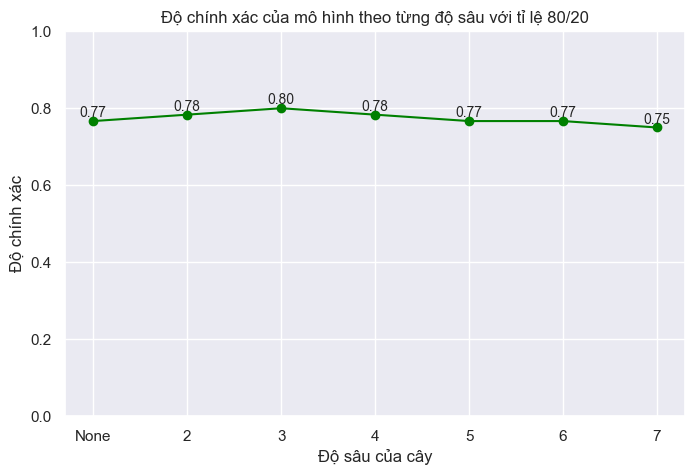

In [7]:
import graphviz
from sklearn import tree
import os

feature_train, label_train, feature_test, label_test = datasets["80_20"]
depth = [None, 2, 3, 4, 5, 6, 7]
depth_labels = ['None' if d is None else str(d) for d in depth]
accuracy_by_depth = []
output_dir = os.path.join(os.getcwd(), "png", "heart_disease", "depth")
os.makedirs(output_dir, exist_ok=True)

for dep in depth:
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=dep)
    clf.fit(feature_train, label_train)
    label_preds = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, label_preds)
    accuracy_by_depth.append(accuracy)
    dot_data = tree.export_graphviz(clf, out_file=None,
            feature_names=[col for col in data.columns if col != "target"],
            class_names=[str(i) for i in np.unique(label_train)],
            filled=True, rounded=True,
            special_characters=True)
    graph = graphviz.Source(dot_data)
    name = f'heart_disease_tree_{dep}'
    graph.render(filename=os.path.join(output_dir, name), format='png', cleanup=True)
    print(f"Depth: {dep}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Saved to {output_dir}/{name}.png")
    
plt.figure(figsize=(8, 5))
plt.plot(depth_labels, accuracy_by_depth, marker='o', linestyle='-', color='green')
plt.title('Độ chính xác của mô hình theo từng độ sâu với tỉ lệ 80/20')
plt.xlabel('Độ sâu của cây')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1)
for i, acc in enumerate(accuracy_by_depth):
    plt.text(depth_labels[i], acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.grid(True)
plt.show()